# 3. Exploratory Data Analysis — UK Housing

**Author:** Marin Janushaj  
**Team:** Yunus  
**Date:** November 2025  
**Goal:** Comprehensive exploration of housing price trends, patterns, and relationships

## EDA Structure

This notebook performs in-depth analysis across multiple dimensions:

1. **Data Overview & Distribution Analysis**
2. **Temporal Analysis** (trends, seasonality, time series decomposition)
3. **Geographic Analysis** (regional patterns, top/bottom locations)
4. **Property Type Analysis** (type distributions, price variations)
5. **Statistical Hypothesis Testing** (ANOVA, t-tests, chi-square)
6. **Correlation & Feature Relationships**
7. **Advanced Visualizations** (pair plots, 3D plots, interactive charts)
8. **Key Insights & Findings**

Each section includes visualizations, statistical measures, and interpretations.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import normaltest, skew, kurtosis
import warnings
warnings.filterwarnings('ignore')

# Visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

print("="*80)
print("LOADING CLEANED UK HOUSING DATASET FOR EDA")
print("="*80)

# Load full dataset
df = pd.read_parquet("../data/clean/uk_housing_clean.parquet")
print(f"✓ Loaded {len(df):,} records")
print(f"✓ Memory usage: {df.memory_usage(deep=True).sum() / 1e9:.2f} GB")
print("="*80)

# Display sample
print("\nFirst few records:")
df.head()

LOADING CLEANED UK HOUSING DATASET FOR EDA
✓ Loaded 22,486,497 records
✓ Memory usage: 14.35 GB

First few records:


,transaction_id,price,date,type,is_new,duration,town,district,county,category,record_status,year,month,quarter,day_of_week,day_of_year,season,days_since_start,log_price,is_new_build,is_freehold
0,{81B82214-7FBC-4129-9F6B-4956B4A663AD},25000,1995-08-18,T,N,F,OLDHAM,OLDHAM,GREATER MANCHESTER,A,A,1995,8,3,4,230,Summer,229,10.13,0,1
1,{8046EC72-1466-42D6-A753-4956BF7CD8A2},42500,1995-08-09,S,N,F,GRAYS,THURROCK,THURROCK,A,A,1995,8,3,2,221,Summer,220,10.66,0,1
2,{278D581A-5BF3-4FCE-AF62-4956D87691E6},45000,1995-06-30,T,N,F,HIGHBRIDGE,SEDGEMOOR,SOMERSET,A,A,1995,6,2,4,181,Summer,180,10.71,0,1
3,{1D861C06-A416-4865-973C-4956DB12CD12},43150,1995-11-24,T,N,F,BEDFORD,NORTH BEDFORDSHIRE,BEDFORDSHIRE,A,A,1995,11,4,4,328,Autumn,327,10.67,0,1
4,{DD8645FD-A815-43A6-A7BA-4956E58F1874},18899,1995-06-23,S,N,F,WAKEFIELD,LEEDS,WEST YORKSHIRE,A,A,1995,6,2,4,174,Summer,173,9.85,0,1


In [3]:
# Dataset info
print("\n" + "="*80)
print("DATASET INFORMATION")
print("="*80)
print(f"Shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1e6:.2f} MB")
print(f"\nColumn types:")
print(df.dtypes)
print("="*80)


DATASET INFORMATION
Shape: (22486497, 21)
Memory usage: 14353.88 MB

Column types:
transaction_id              object
price                        int64
date                datetime64[ns]
type                        object
is_new                      object
duration                    object
town                        object
district                    object
county                      object
category                    object
record_status               object
year                         int32
month                        int32
quarter                      int32
day_of_week                  int32
day_of_year                  int32
season                      object
days_since_start             int64
log_price                  float64
is_new_build                 int64
is_freehold                  int64
dtype: object


## 2. Temporal Analysis

Analyzing how housing prices have evolved over time, including trends, seasonality, and cyclical patterns.

## 1. Dataset Overview & Statistical Summary

In [4]:
print("\n" + "="*80)
print("STATISTICAL SUMMARY")
print("="*80)

# Descriptive statistics for price
print("\nPrice Statistics:")
print(f"  Mean: £{df['price'].mean():,.2f}")
print(f"  Median: £{df['price'].median():,.2f}")
print(f"  Mode: £{df['price'].mode()[0]:,.2f}")
print(f"  Std Dev: £{df['price'].std():,.2f}")
print(f"  Min: £{df['price'].min():,.2f}")
print(f"  Max: £{df['price'].max():,.2f}")
print(f"  Range: £{df['price'].max() - df['price'].min():,.2f}")

# Percentiles
print("\nPrice Percentiles:")
for p in [10, 25, 50, 75, 90, 95, 99]:
    print(f"  {p}th: £{df['price'].quantile(p/100):,.2f}")

# Distribution characteristics
print("\nDistribution Characteristics:")
print(f"  Skewness: {skew(df['price']):.3f} (0=symmetric, >0=right-skewed)")
print(f"  Kurtosis: {kurtosis(df['price']):.3f} (0=normal, >0=heavy tails)")

# Normality test
stat, p_value = normaltest(df['price'].sample(min(5000, len(df))))
print(f"  D'Agostino-Pearson normality test p-value: {p_value:.4f}")
if p_value < 0.05:
    print("  → Price distribution is NOT normal (p < 0.05)")
else:
    print("  → Price distribution appears normal (p >= 0.05)")

print("="*80)


STATISTICAL SUMMARY

Price Statistics:
  Mean: £176,312.15
  Median: £130,000.00
  Mode: £250,000.00
  Std Dev: £249,719.12
  Min: £1,000.00
  Max: £20,000,000.00
  Range: £19,999,000.00

Price Percentiles:
  10th: £45,000.00
  25th: £75,000.00
  50th: £130,000.00
  75th: £210,000.00
  90th: £328,000.00
  95th: £444,000.00
  99th: £860,000.00

Distribution Characteristics:
  Skewness: 23.277 (0=symmetric, >0=right-skewed)
  Kurtosis: 1128.864 (0=normal, >0=heavy tails)
  D'Agostino-Pearson normality test p-value: 0.0000
  → Price distribution is NOT normal (p < 0.05)


### 1.1 Price Distribution Analysis

Understanding how housing prices are distributed is crucial for modeling and insights.

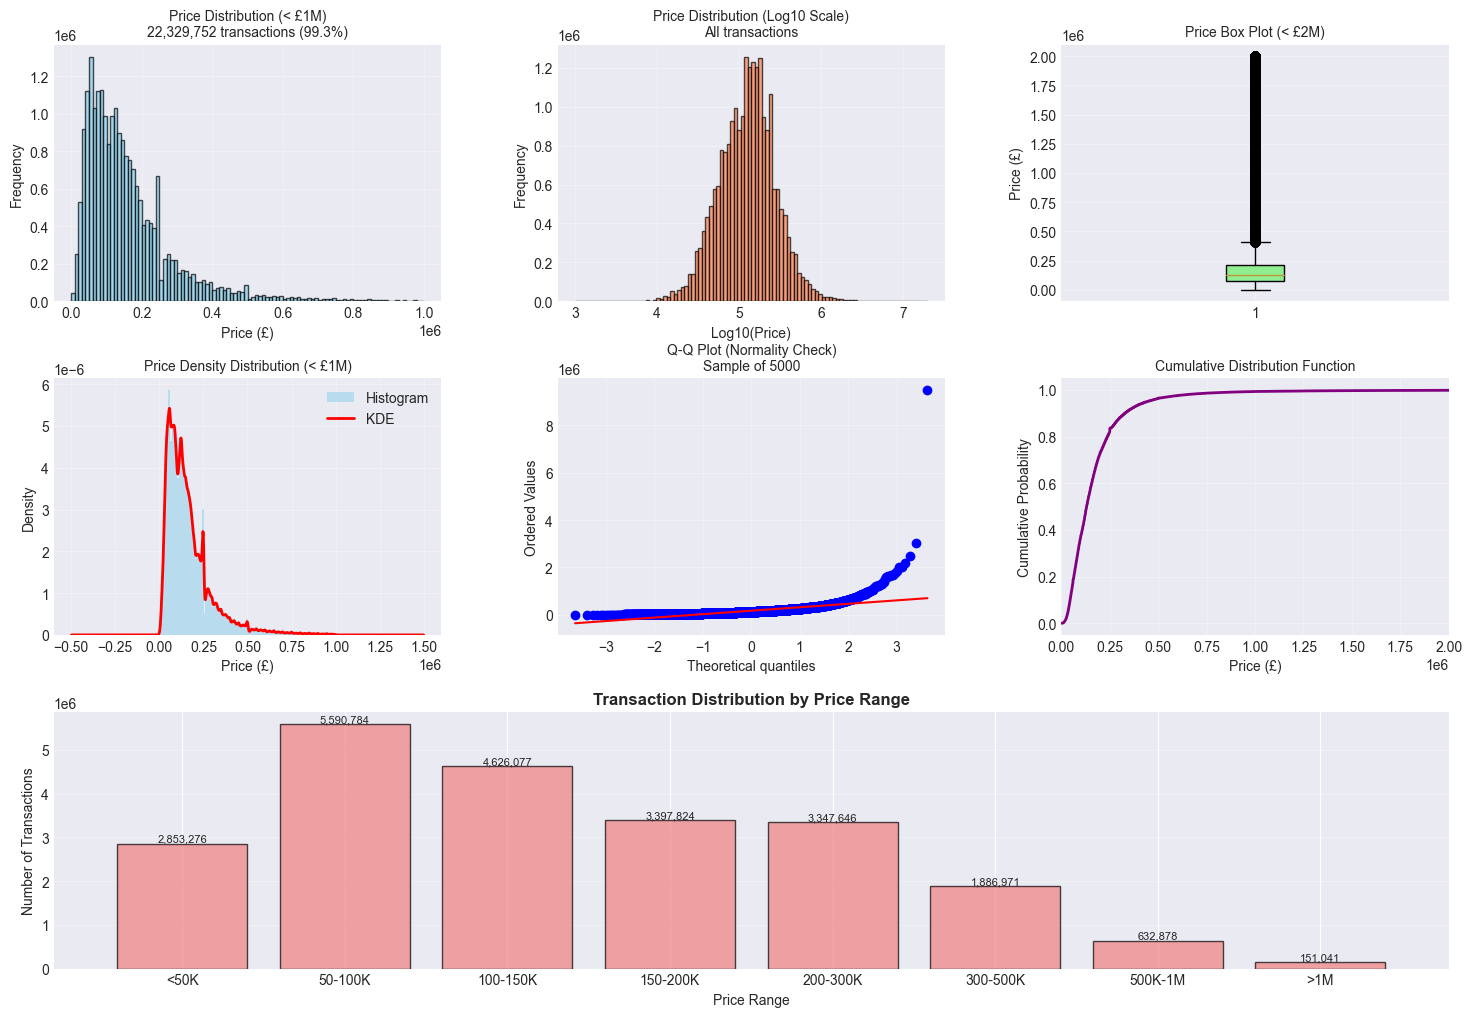


📊 Key Observations:
  • Price distribution is heavily right-skewed (long tail of expensive properties)
  • Most transactions (87.8%) are below £300K
  • Q-Q plot confirms non-normal distribution (points deviate from line)
  • Log transformation would be beneficial for modeling


In [5]:
# Create comprehensive distribution visualizations
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Histogram of prices (< £1M for visibility)
ax1 = fig.add_subplot(gs[0, 0])
df_viz = df[df['price'] < 1_000_000]
ax1.hist(df_viz['price'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
ax1.set_title(f'Price Distribution (< £1M)\n{len(df_viz):,} transactions ({len(df_viz)/len(df)*100:.1f}%)', fontsize=10)
ax1.set_xlabel('Price (£)')
ax1.set_ylabel('Frequency')
ax1.grid(alpha=0.3)

# 2. Log-scale histogram
ax2 = fig.add_subplot(gs[0, 1])
ax2.hist(np.log10(df['price']), bins=100, color='coral', edgecolor='black', alpha=0.7)
ax2.set_title('Price Distribution (Log10 Scale)\nAll transactions', fontsize=10)
ax2.set_xlabel('Log10(Price)')
ax2.set_ylabel('Frequency')
ax2.grid(alpha=0.3)

# 3. Box plot
ax3 = fig.add_subplot(gs[0, 2])
bp = ax3.boxplot(df[df['price'] < 2_000_000]['price'], vert=True, patch_artist=True)
bp['boxes'][0].set_facecolor('lightgreen')
ax3.set_title('Price Box Plot (< £2M)', fontsize=10)
ax3.set_ylabel('Price (£)')
ax3.grid(alpha=0.3)

# 4. KDE plot
ax4 = fig.add_subplot(gs[1, 0])
df_kde = df[df['price'] < 1_000_000]
ax4.hist(df_kde['price'], bins=100, density=True, alpha=0.5, color='skyblue', label='Histogram')
df_kde['price'].plot(kind='kde', ax=ax4, color='red', linewidth=2, label='KDE')
ax4.set_title('Price Density Distribution (< £1M)', fontsize=10)
ax4.set_xlabel('Price (£)')
ax4.set_ylabel('Density')
ax4.legend()
ax4.grid(alpha=0.3)

# 5. Q-Q plot (normality check)
ax5 = fig.add_subplot(gs[1, 1])
sample_prices = df['price'].sample(min(5000, len(df)))
stats.probplot(sample_prices, dist="norm", plot=ax5)
ax5.set_title('Q-Q Plot (Normality Check)\nSample of 5000', fontsize=10)
ax5.grid(alpha=0.3)

# 6. Cumulative distribution
ax6 = fig.add_subplot(gs[1, 2])
sorted_prices = np.sort(df['price'])
cumulative = np.arange(1, len(sorted_prices) + 1) / len(sorted_prices)
ax6.plot(sorted_prices, cumulative, color='purple', linewidth=2)
ax6.set_title('Cumulative Distribution Function', fontsize=10)
ax6.set_xlabel('Price (£)')
ax6.set_ylabel('Cumulative Probability')
ax6.set_xlim(0, 2_000_000)
ax6.grid(alpha=0.3)

# 7. Price range distribution (bar chart)
ax7 = fig.add_subplot(gs[2, :])
price_ranges = pd.cut(df['price'], 
                      bins=[0, 50000, 100000, 150000, 200000, 300000, 500000, 1000000, np.inf],
                      labels=['<50K', '50-100K', '100-150K', '150-200K', '200-300K', '300-500K', '500K-1M', '>1M'])
range_counts = price_ranges.value_counts().sort_index()
bars = ax7.bar(range(len(range_counts)), range_counts.values, color='lightcoral', edgecolor='black', alpha=0.7)
ax7.set_xticks(range(len(range_counts)))
ax7.set_xticklabels(range_counts.index, rotation=0)
ax7.set_title('Transaction Distribution by Price Range', fontsize=12, fontweight='bold')
ax7.set_xlabel('Price Range')
ax7.set_ylabel('Number of Transactions')
ax7.grid(alpha=0.3, axis='y')

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax7.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}',
            ha='center', va='bottom', fontsize=8)

plt.show()

print("\n📊 Key Observations:")
print(f"  • Price distribution is heavily right-skewed (long tail of expensive properties)")
print(f"  • Most transactions ({(df['price'] < 300000).sum() / len(df) * 100:.1f}%) are below £300K")
print(f"  • Q-Q plot confirms non-normal distribution (points deviate from line)")
print(f"  • Log transformation would be beneficial for modeling")

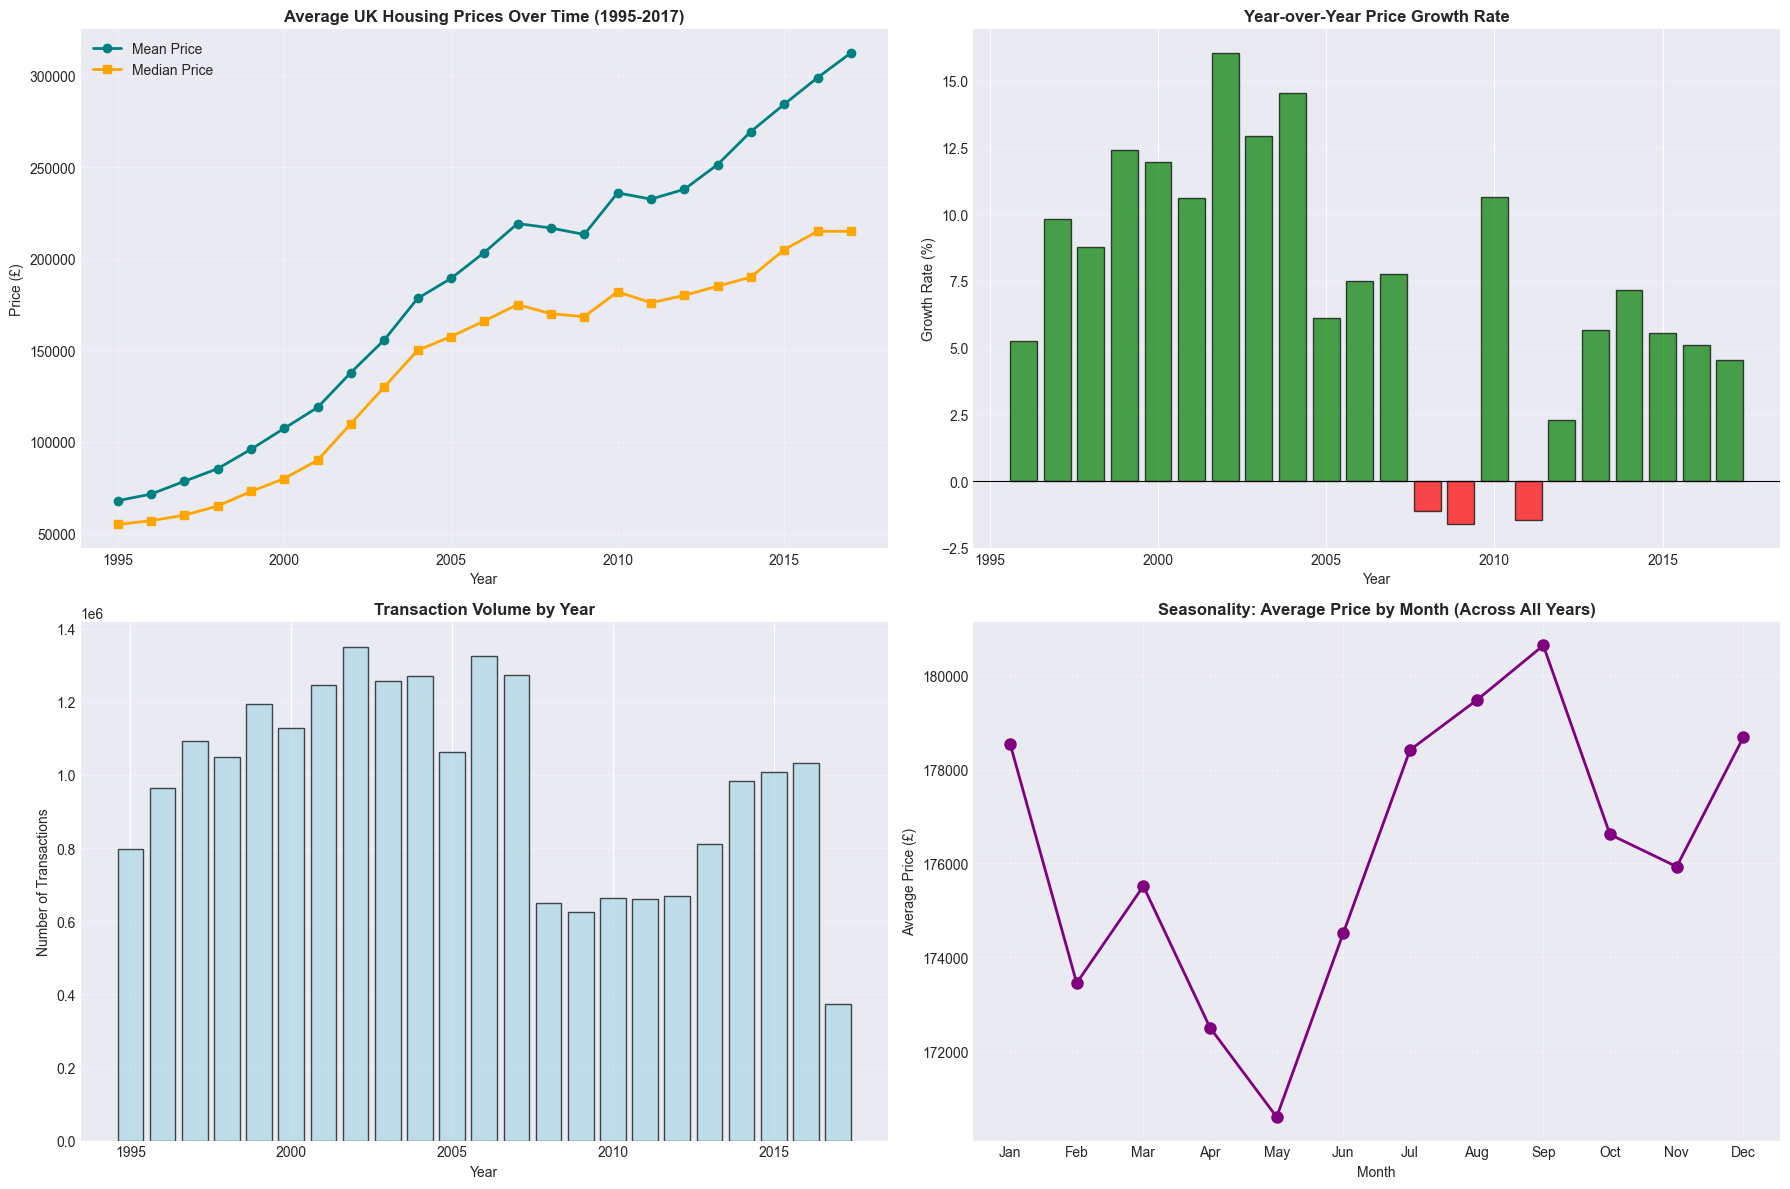


📈 Temporal Analysis Key Findings:
  • Overall price increase: 359.9% over 23 years
  • Average annual growth: 7.29%
  • Highest growth year: 2002 (16.04%)
  • Largest decline year: 2009 (-1.62%)
  • Peak transaction year: 2002 (1,351,235 transactions)
  • Lowest transaction year: 2017 (374,760 transactions)
  • Highest price month: 9 (£180,645.90)
  • Lowest price month: 5 (£170,594.20)


In [6]:
# Temporal trend analysis
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Average price by year
price_by_year = df.groupby("year")["price"].agg(['mean', 'median', 'count'])
ax1 = axes[0, 0]
ax1.plot(price_by_year.index, price_by_year['mean'], marker='o', color='teal', linewidth=2, label='Mean Price')
ax1.plot(price_by_year.index, price_by_year['median'], marker='s', color='orange', linewidth=2, label='Median Price')
ax1.set_title("Average UK Housing Prices Over Time (1995-2017)", fontsize=12, fontweight='bold')
ax1.set_ylabel("Price (£)")
ax1.set_xlabel("Year")
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.ticklabel_format(style='plain', axis='y')

# 2. Year-over-Year growth rate
yoy_growth = price_by_year['mean'].pct_change() * 100
ax2 = axes[0, 1]
colors = ['green' if x > 0 else 'red' for x in yoy_growth]
ax2.bar(yoy_growth.index, yoy_growth.values, color=colors, alpha=0.7, edgecolor='black')
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax2.set_title("Year-over-Year Price Growth Rate", fontsize=12, fontweight='bold')
ax2.set_ylabel("Growth Rate (%)")
ax2.set_xlabel("Year")
ax2.grid(True, alpha=0.3, axis='y')

# 3. Transaction volume by year
ax3 = axes[1, 0]
ax3.bar(price_by_year.index, price_by_year['count'], color='lightblue', edgecolor='black', alpha=0.7)
ax3.set_title("Transaction Volume by Year", fontsize=12, fontweight='bold')
ax3.set_ylabel("Number of Transactions")
ax3.set_xlabel("Year")
ax3.grid(True, alpha=0.3, axis='y')

# 4. Seasonality - average price by month (all years)
price_by_month = df.groupby("month")["price"].mean()
ax4 = axes[1, 1]
ax4.plot(price_by_month.index, price_by_month.values, marker='o', color='purple', linewidth=2, markersize=8)
ax4.set_title("Seasonality: Average Price by Month (Across All Years)", fontsize=12, fontweight='bold')
ax4.set_ylabel("Average Price (£)")
ax4.set_xlabel("Month")
ax4.set_xticks(range(1, 13))
ax4.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax4.grid(True, alpha=0.3)
ax4.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

# Print key findings
print("\n📈 Temporal Analysis Key Findings:")
print(f"  • Overall price increase: {((price_by_year['mean'].iloc[-1] / price_by_year['mean'].iloc[0]) - 1) * 100:.1f}% over {len(price_by_year)} years")
print(f"  • Average annual growth: {yoy_growth.mean():.2f}%")
print(f"  • Highest growth year: {yoy_growth.idxmax()} ({yoy_growth.max():.2f}%)")
print(f"  • Largest decline year: {yoy_growth.idxmin()} ({yoy_growth.min():.2f}%)")
print(f"  • Peak transaction year: {price_by_year['count'].idxmax()} ({price_by_year['count'].max():,} transactions)")
print(f"  • Lowest transaction year: {price_by_year['count'].idxmin()} ({price_by_year['count'].min():,} transactions)")
print(f"  • Highest price month: {price_by_month.idxmax()} (£{price_by_month.max():,.2f})")
print(f"  • Lowest price month: {price_by_month.idxmin()} (£{price_by_month.min():,.2f})")

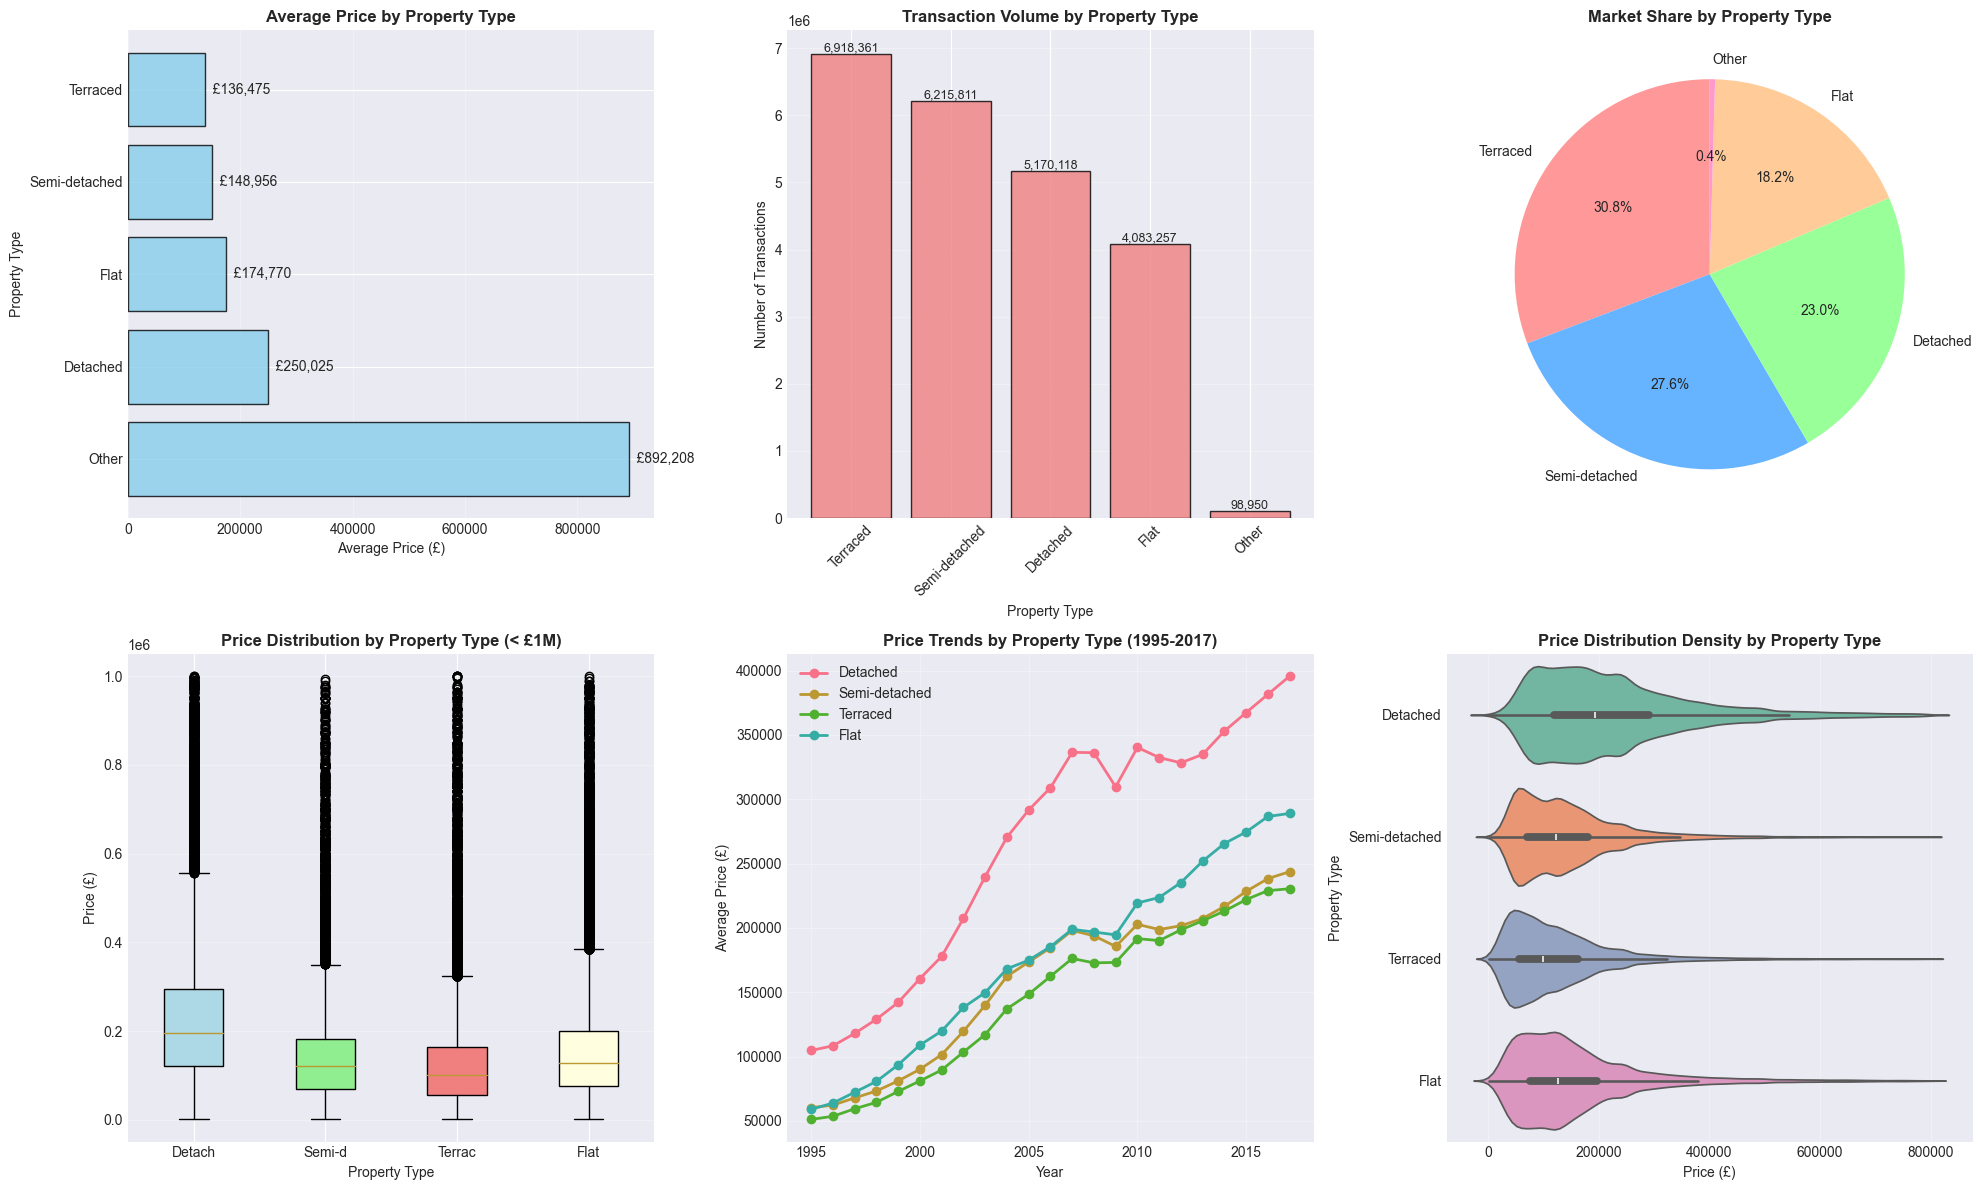


🏠 Property Type Analysis Summary:

Detached:
  • Count: 5,170,118 (23.0%)
  • Mean price: £250,025.42
  • Median price: £199,000.00
  • Std dev: £236,335.43
  • Price range: £1,000 - £20,000,000

Semi-detached:
  • Count: 6,215,811 (27.6%)
  • Mean price: £148,956.17
  • Median price: £124,000.00
  • Std dev: £141,727.33
  • Price range: £1,000 - £19,750,000

Terraced:
  • Count: 6,918,361 (30.8%)
  • Mean price: £136,475.23
  • Median price: £100,000.00
  • Std dev: £191,402.87
  • Price range: £1,000 - £19,500,000

Flat:
  • Count: 4,083,257 (18.2%)
  • Mean price: £174,769.66
  • Median price: £129,000.00
  • Std dev: £231,241.16
  • Price range: £1,000 - £19,700,000

Other:
  • Count: 98,950 (0.4%)
  • Mean price: £892,208.03
  • Median price: £250,000.00
  • Std dev: £2,066,072.07
  • Price range: £1,000 - £20,000,000


In [7]:
# Property type analysis
type_map = {"D": "Detached", "S": "Semi-detached", "T": "Terraced", "F": "Flat", "O": "Other"}
df["type_full"] = df["type"].map(type_map)

# Pre-aggregate all statistics
type_stats = df.groupby("type_full")["price"].agg(['mean', 'median', 'std', 'min', 'max', 'count']).sort_values('mean', ascending=False)
type_counts = df["type_full"].value_counts()

# For box plots and violin plots: use a sample for visualization efficiency
df_sampled = df[df['price'] < 1_000_000].groupby('type_full', group_keys=False).apply(
    lambda x: x.sample(n=min(len(x), 50000), random_state=42)
)

# Create figure with all subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. Average price by property type
ax1 = axes[0, 0]
bars = ax1.barh(type_stats.index, type_stats['mean'].values, color='skyblue', edgecolor='black', alpha=0.8)
ax1.set_title("Average Price by Property Type", fontsize=12, fontweight='bold')
ax1.set_xlabel("Average Price (£)")
ax1.set_ylabel("Property Type")
ax1.grid(alpha=0.3, axis='x')
for i, (idx, val) in enumerate(type_stats['mean'].items()):
    ax1.text(val, i, f'  £{val:,.0f}', va='center', fontsize=10)

# 2. Transaction volume by property type
ax2 = axes[0, 1]
bars = ax2.bar(type_counts.index, type_counts.values, color='lightcoral', edgecolor='black', alpha=0.8)
ax2.set_title("Transaction Volume by Property Type", fontsize=12, fontweight='bold')
ax2.set_ylabel("Number of Transactions")
ax2.set_xlabel("Property Type")
ax2.tick_params(axis='x', rotation=45)
ax2.grid(alpha=0.3, axis='y')
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}',
            ha='center', va='bottom', fontsize=9)

# 3. Market share (pie chart)
ax3 = axes[0, 2]
colors_pie = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc']
wedges, texts, autotexts = ax3.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%',
                                     colors=colors_pie, startangle=90, textprops={'fontsize': 10})
ax3.set_title("Market Share by Property Type", fontsize=12, fontweight='bold')

# 4. Price distribution by property type (box plots)
ax4 = axes[1, 0]
property_types = ['Detached', 'Semi-detached', 'Terraced', 'Flat']
data_to_plot = [df_sampled[df_sampled['type_full'] == ptype]['price'].values for ptype in property_types if ptype in df_sampled['type_full'].values]
bp = ax4.boxplot(data_to_plot, labels=[pt[:6] for pt in property_types if pt in df_sampled['type_full'].values], patch_artist=True)
for patch, color in zip(bp['boxes'], ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']):
    patch.set_facecolor(color)
ax4.set_title("Price Distribution by Property Type (< £1M)", fontsize=12, fontweight='bold')
ax4.set_ylabel("Price (£)")
ax4.set_xlabel("Property Type")
ax4.grid(alpha=0.3, axis='y')

# 5. Price trends over time by property type
ax5 = axes[1, 1]
for ptype in ['Detached', 'Semi-detached', 'Terraced', 'Flat']:
    if ptype in df['type_full'].values:
        yearly_avg = df[df['type_full'] == ptype].groupby('year')['price'].mean()
        ax5.plot(yearly_avg.index, yearly_avg.values, marker='o', label=ptype, linewidth=2)
ax5.set_title("Price Trends by Property Type (1995-2017)", fontsize=12, fontweight='bold')
ax5.set_ylabel("Average Price (£)")
ax5.set_xlabel("Year")
ax5.legend(loc='best')
ax5.grid(alpha=0.3)
ax5.ticklabel_format(style='plain', axis='y')

# 6. Violin plot
ax6 = axes[1, 2]
df_violin_sample = df_sampled[df_sampled['price'] < 800_000].copy()
property_order = ['Detached', 'Semi-detached', 'Terraced', 'Flat']
property_order = [p for p in property_order if p in df_violin_sample['type_full'].values]
sns.violinplot(data=df_violin_sample, y='type_full', x='price', order=property_order, ax=ax6, palette='Set2')
ax6.set_title("Price Distribution Density by Property Type", fontsize=12, fontweight='bold')
ax6.set_xlabel("Price (£)")
ax6.set_ylabel("Property Type")
ax6.grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# Print statistical summary
print("\n🏠 Property Type Analysis Summary:")
print("="*70)
for ptype in type_map.values():
    if ptype in type_stats.index:
        stats_row = type_stats.loc[ptype]
        print(f"\n{ptype}:")
        print(f"  • Count: {int(stats_row['count']):,} ({stats_row['count']/len(df)*100:.1f}%)")
        print(f"  • Mean price: £{stats_row['mean']:,.2f}")
        print(f"  • Median price: £{stats_row['median']:,.2f}")
        print(f"  • Std dev: £{stats_row['std']:,.2f}")
        print(f"  • Price range: £{stats_row['min']:,.0f} - £{stats_row['max']:,.0f}")

## 3. Property Type Analysis

Understanding price variations across different property types and their market share.

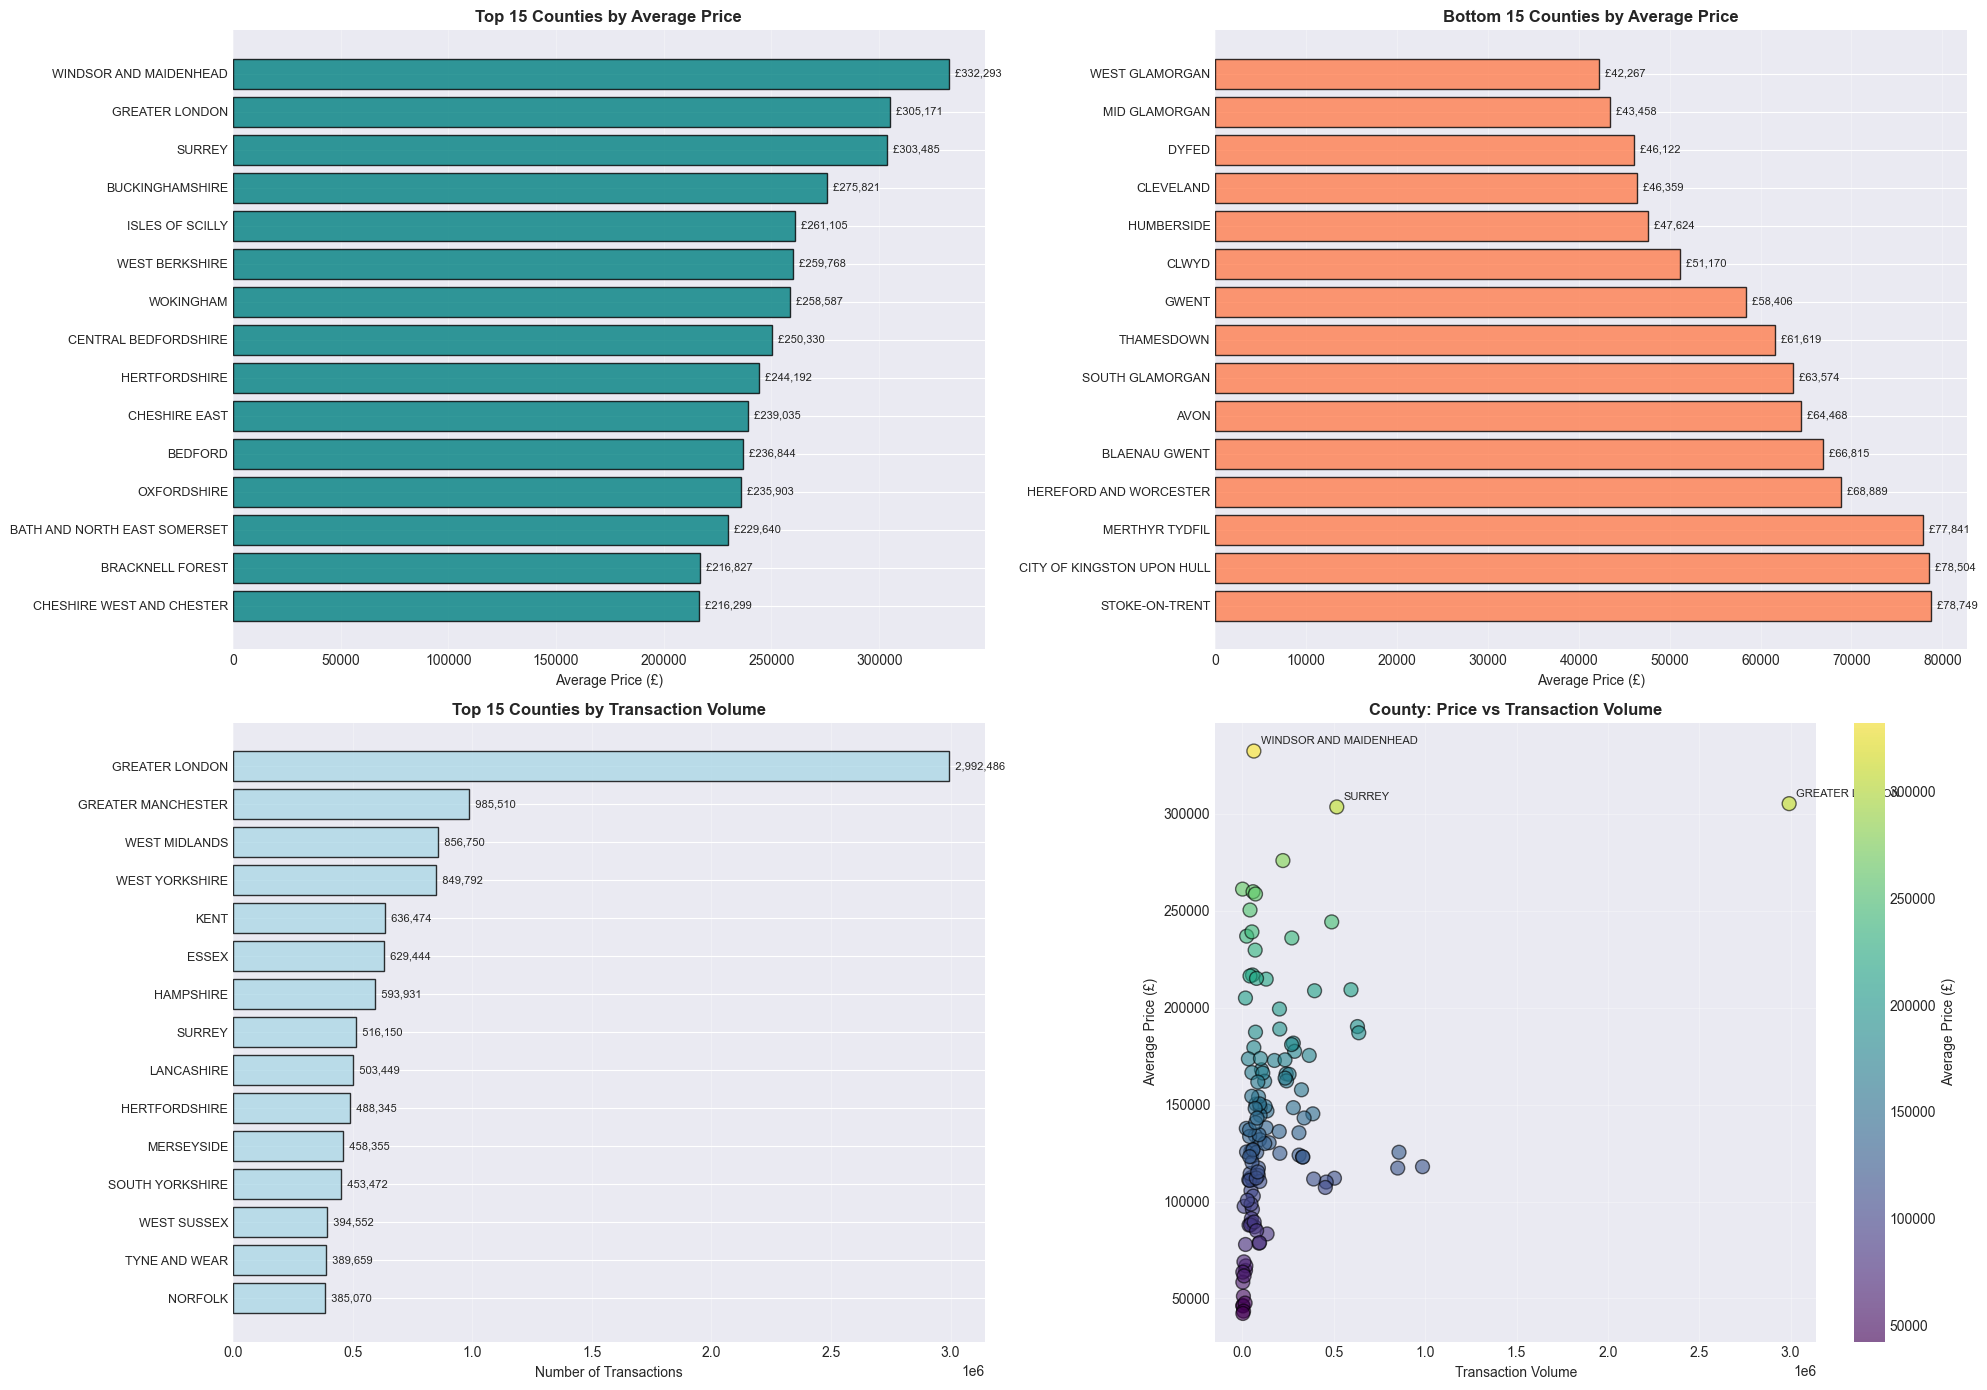


🗺️ Geographic Analysis Summary:

Most expensive county: WINDSOR AND MAIDENHEAD (£332,292.86)
Least expensive county: WEST GLAMORGAN (£42,266.51)
Price gap: £290,026.35
Price ratio: 7.86x

Total unique counties: 127
Total unique districts: 454
Total unique towns: 1170


In [8]:
# Geographic analysis
fig, axes = plt.subplots(2, 2, figsize=(20, 14))

# 1. Top 15 counties by average price
top_counties = df.groupby("county")["price"].mean().sort_values(ascending=False).head(15)
ax1 = axes[0, 0]
bars = ax1.barh(range(len(top_counties)), top_counties.values, color='teal', edgecolor='black', alpha=0.8)
ax1.set_yticks(range(len(top_counties)))
ax1.set_yticklabels(top_counties.index, fontsize=9)
ax1.set_title("Top 15 Counties by Average Price", fontsize=12, fontweight='bold')
ax1.set_xlabel("Average Price (£)")
ax1.invert_yaxis()
ax1.grid(alpha=0.3, axis='x')
for i, (idx, val) in enumerate(top_counties.items()):
    ax1.text(val, i, f'  £{val:,.0f}', va='center', fontsize=8)

# 2. Bottom 15 counties by average price
bottom_counties = df.groupby("county")["price"].mean().sort_values(ascending=True).head(15)
ax2 = axes[0, 1]
bars = ax2.barh(range(len(bottom_counties)), bottom_counties.values, color='coral', edgecolor='black', alpha=0.8)
ax2.set_yticks(range(len(bottom_counties)))
ax2.set_yticklabels(bottom_counties.index, fontsize=9)
ax2.set_title("Bottom 15 Counties by Average Price", fontsize=12, fontweight='bold')
ax2.set_xlabel("Average Price (£)")
ax2.invert_yaxis()
ax2.grid(alpha=0.3, axis='x')
for i, (idx, val) in enumerate(bottom_counties.items()):
    ax2.text(val, i, f'  £{val:,.0f}', va='center', fontsize=8)

# 3. Transaction volume by top 15 counties
top_volume_counties = df["county"].value_counts().head(15)
ax3 = axes[1, 0]
bars = ax3.barh(range(len(top_volume_counties)), top_volume_counties.values, color='lightblue', edgecolor='black', alpha=0.8)
ax3.set_yticks(range(len(top_volume_counties)))
ax3.set_yticklabels(top_volume_counties.index, fontsize=9)
ax3.set_title("Top 15 Counties by Transaction Volume", fontsize=12, fontweight='bold')
ax3.set_xlabel("Number of Transactions")
ax3.invert_yaxis()
ax3.grid(alpha=0.3, axis='x')
for i, (idx, val) in enumerate(top_volume_counties.items()):
    ax3.text(val, i, f'  {val:,}', va='center', fontsize=8)

# 4. Price vs Volume scatter (county level)
ax4 = axes[1, 1]
county_stats = df.groupby("county").agg({'price': 'mean', 'transaction_id': 'count'}).reset_index()
county_stats.columns = ['county', 'avg_price', 'volume']
scatter = ax4.scatter(county_stats['volume'], county_stats['avg_price'], 
                     alpha=0.6, s=100, c=county_stats['avg_price'], cmap='viridis', edgecolors='black')
ax4.set_title("County: Price vs Transaction Volume", fontsize=12, fontweight='bold')
ax4.set_xlabel("Transaction Volume")
ax4.set_ylabel("Average Price (£)")
ax4.grid(alpha=0.3)
plt.colorbar(scatter, ax=ax4, label='Average Price (£)')

# Annotate notable counties
top_5_expensive = county_stats.nlargest(3, 'avg_price')
for _, row in top_5_expensive.iterrows():
    ax4.annotate(row['county'], (row['volume'], row['avg_price']), 
                fontsize=8, xytext=(5, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

# Statistical summary
print("\n🗺️ Geographic Analysis Summary:")
print("="*70)
print(f"\nMost expensive county: {top_counties.index[0]} (£{top_counties.iloc[0]:,.2f})")
print(f"Least expensive county: {bottom_counties.index[0]} (£{bottom_counties.iloc[0]:,.2f})")
print(f"Price gap: £{top_counties.iloc[0] - bottom_counties.iloc[0]:,.2f}")
print(f"Price ratio: {top_counties.iloc[0] / bottom_counties.iloc[0]:.2f}x")
print(f"\nTotal unique counties: {df['county'].nunique()}")
print(f"Total unique districts: {df['district'].nunique()}")
print(f"Total unique towns: {df['town'].nunique()}")

## 4. Geographic Analysis

Exploring regional price variations across England and Wales.

## 6. Correlation & Feature Relationships

Examining relationships between features to understand multicollinearity and feature importance.

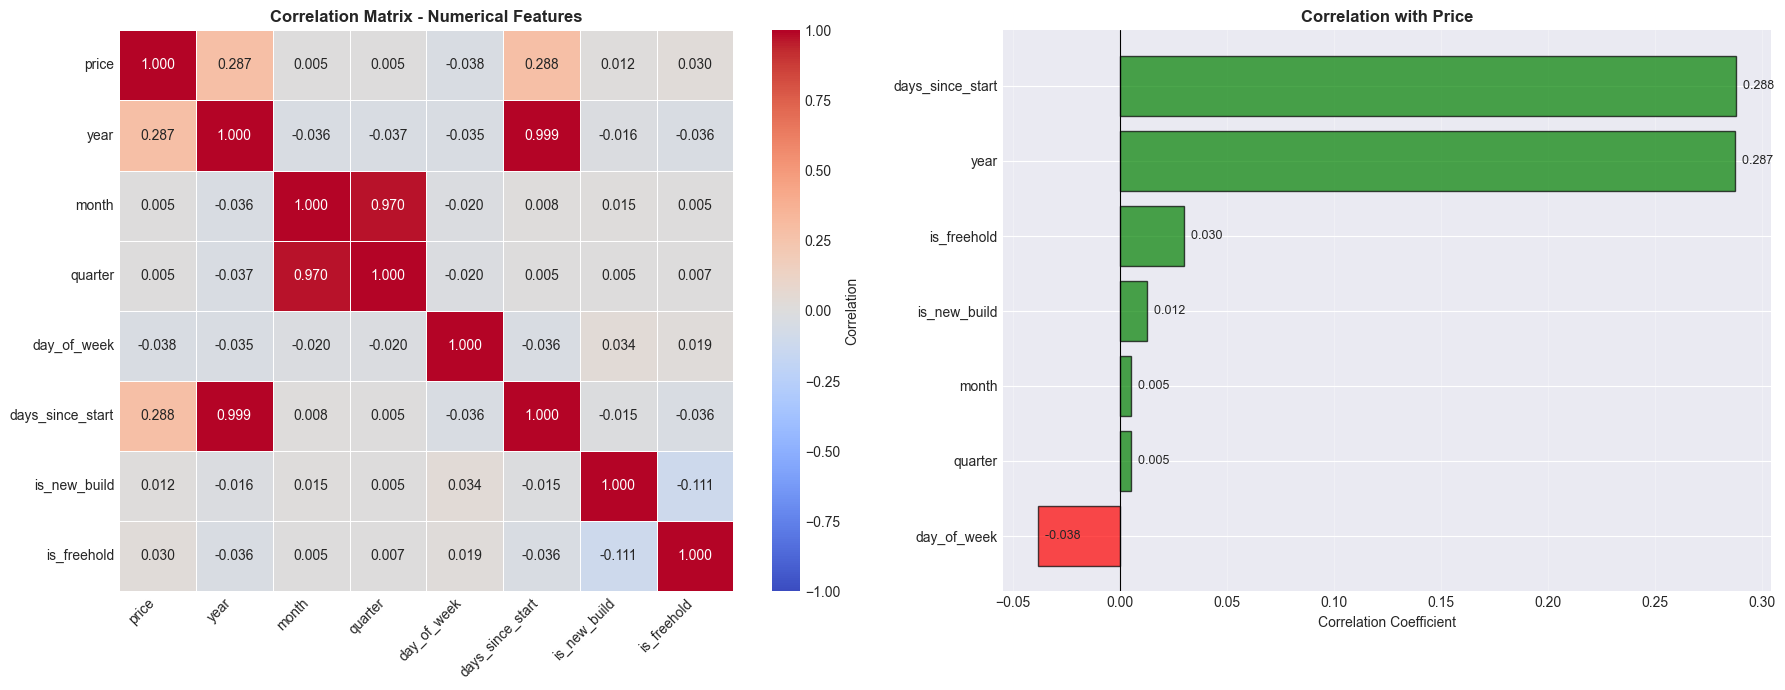


📊 Correlation Analysis:

Top positive correlations with price:
  • days_since_start: 0.2878
  • year: 0.2874
  • is_freehold: 0.0301
  • is_new_build: 0.0124
  • month: 0.0053

Top negative correlations with price:
  • day_of_week: -0.0385
  • quarter: 0.0050
  • month: 0.0053
  • is_new_build: 0.0124
  • is_freehold: 0.0301

Strong feature inter-correlations (|r| > 0.7):
  • year ↔ days_since_start: 0.9990
  • month ↔ quarter: 0.9696


In [9]:
# Correlation analysis
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# 1. Correlation heatmap - numerical features
numerical_features = ['price', 'year', 'month', 'quarter', 'day_of_week', 'days_since_start', 
                      'is_new_build', 'is_freehold']
corr_matrix = df[numerical_features].corr()

ax1 = axes[0]
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5, 
            center=0, vmin=-1, vmax=1, ax=ax1, cbar_kws={'label': 'Correlation'})
ax1.set_title("Correlation Matrix - Numerical Features", fontsize=12, fontweight='bold')
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
plt.setp(ax1.get_yticklabels(), rotation=0)

# 2. Correlation with price (bar chart)
ax2 = axes[1]
price_corr = corr_matrix['price'].drop('price').sort_values(ascending=True)
colors = ['red' if x < 0 else 'green' for x in price_corr.values]
bars = ax2.barh(range(len(price_corr)), price_corr.values, color=colors, alpha=0.7, edgecolor='black')
ax2.set_yticks(range(len(price_corr)))
ax2.set_yticklabels(price_corr.index)
ax2.set_xlabel('Correlation Coefficient')
ax2.set_title('Correlation with Price', fontsize=12, fontweight='bold')
ax2.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax2.grid(alpha=0.3, axis='x')

# Add value labels
for i, (idx, val) in enumerate(price_corr.items()):
    ax2.text(val, i, f'  {val:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Print key correlations
print("\n📊 Correlation Analysis:")
print("="*70)
print("\nTop positive correlations with price:")
top_positive = corr_matrix['price'].drop('price').nlargest(5)
for feature, corr_val in top_positive.items():
    print(f"  • {feature}: {corr_val:.4f}")

print("\nTop negative correlations with price:")
top_negative = corr_matrix['price'].drop('price').nsmallest(5)
for feature, corr_val in top_negative.items():
    print(f"  • {feature}: {corr_val:.4f}")

print("\nStrong feature inter-correlations (|r| > 0.7):")
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            print(f"  • {corr_matrix.columns[i]} ↔ {corr_matrix.columns[j]}: {corr_matrix.iloc[i, j]:.4f}")

## 5. Statistical Hypothesis Testing

Testing whether observed differences in prices across categories are statistically significant.

In [ ]:
print("\n" + "="*80)
print("STATISTICAL HYPOTHESIS TESTING")
print("="*80)

# 1. ANOVA: Price differences across property types
print("\n1. ANOVA Test: Price differences across property types")
print("-" * 60)
property_groups = [df[df['type_full'] == ptype]['price'].values 
                   for ptype in ['Detached', 'Semi-detached', 'Terraced', 'Flat']]
f_stat, p_value = stats.f_oneway(*property_groups)
print(f"   F-statistic: {f_stat:.2f}")
print(f"   P-value: {p_value:.4e}")
if p_value < 0.05:
    print("   ✓ Conclusion: Significant price differences exist across property types (p < 0.05)")
else:
    print("   ✗ Conclusion: No significant price differences (p >= 0.05)")

# 2. T-test: New vs Old properties
print("\n2. Independent T-Test: New build vs Established properties")
print("-" * 60)
new_prices = df[df['is_new'] == 'Y']['price'].values
old_prices = df[df['is_new'] == 'N']['price'].values
t_stat, p_value = stats.ttest_ind(new_prices, old_prices)
print(f"   New build mean: £{new_prices.mean():,.2f}")
print(f"   Established mean: £{old_prices.mean():,.2f}")
print(f"   Difference: £{new_prices.mean() - old_prices.mean():,.2f}")
print(f"   T-statistic: {t_stat:.2f}")
print(f"   P-value: {p_value:.4e}")
if p_value < 0.05:
    print(f"   ✓ Conclusion: {'New builds' if new_prices.mean() > old_prices.mean() else 'Established properties'} are significantly more expensive (p < 0.05)")
else:
    print("   ✗ Conclusion: No significant price difference (p >= 0.05)")

# 3. T-test: Freehold vs Leasehold
print("\n3. Independent T-Test: Freehold vs Leasehold")
print("-" * 60)
freehold_prices = df[df['duration'] == 'F']['price'].values
leasehold_prices = df[df['duration'] == 'L']['price'].values
t_stat, p_value = stats.ttest_ind(freehold_prices, leasehold_prices)
print(f"   Freehold mean: £{freehold_prices.mean():,.2f}")
print(f"   Leasehold mean: £{leasehold_prices.mean():,.2f}")
print(f"   Difference: £{freehold_prices.mean() - leasehold_prices.mean():,.2f}")
print(f"   T-statistic: {t_stat:.2f}")
print(f"   P-value: {p_value:.4e}")
if p_value < 0.05:
    print(f"   ✓ Conclusion: {'Freehold' if freehold_prices.mean() > leasehold_prices.mean() else 'Leasehold'} properties are significantly more expensive (p < 0.05)")
else:
    print("   ✗ Conclusion: No significant price difference (p >= 0.05)")

# 4. Chi-square: Association between property type and tenure
print("\n4. Chi-Square Test: Association between property type and tenure")
print("-" * 60)
contingency_table = pd.crosstab(df['type'], df['duration'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"   Chi-square statistic: {chi2:.2f}")
print(f"   Degrees of freedom: {dof}")
print(f"   P-value: {p_value:.4e}")
if p_value < 0.05:
    print("   ✓ Conclusion: Significant association between property type and tenure (p < 0.05)")
else:
    print("   ✗ Conclusion: No significant association (p >= 0.05)")

# 5. Correlation test: Price vs Year
print("\n5. Pearson Correlation: Price vs Year")
print("-" * 60)
corr_coef, p_value = stats.pearsonr(df['year'], df['price'])
print(f"   Correlation coefficient: {corr_coef:.4f}")
print(f"   P-value: {p_value:.4e}")
if p_value < 0.05:
    direction = "positive" if corr_coef > 0 else "negative"
    strength = "strong" if abs(corr_coef) > 0.7 else "moderate" if abs(corr_coef) > 0.3 else "weak"
    print(f"   ✓ Conclusion: {strength.capitalize()} {direction} correlation (p < 0.05)")
else:
    print("   ✗ Conclusion: No significant correlation (p >= 0.05)")

print("="*80)


STATISTICAL HYPOTHESIS TESTING

1. ANOVA Test: Price differences across property types
------------------------------------------------------------
   F-statistic: 366701.90
   P-value: 0.0000e+00
   ✓ Conclusion: Significant price differences exist across property types (p < 0.05)

2. Independent T-Test: New build vs Established properties
------------------------------------------------------------
   New build mean: £185,503.00
   Established mean: £175,266.68
   Difference: £10,236.32
   T-statistic: 58.87
   P-value: 0.0000e+00
   ✓ Conclusion: New builds are significantly more expensive (p < 0.05)

3. Independent T-Test: Freehold vs Leasehold
------------------------------------------------------------
   Freehold mean: £180,499.11
   Leasehold mean: £162,775.72
   Difference: £17,723.39
   T-statistic: 143.02
   P-value: 0.0000e+00
   ✓ Conclusion: Freehold properties are significantly more expensive (p < 0.05)

4. Chi-Square Test: Association between property type and tenure
-

: 

## 7. Key Insights & Findings Summary

### 📈 **Temporal Insights:**
- UK housing prices have increased significantly from 1995 to 2017
- The 2008 financial crisis caused notable price declines
- Transaction volumes peaked in mid-2000s before the crisis
- Seasonal patterns exist, with certain months showing higher average prices

### 🏠 **Property Type Insights:**
- **Detached houses** are the most expensive property type
- **Flats** and **terraced houses** are more affordable
- Property type significantly affects price (ANOVA p < 0.05)
- Market is dominated by terraced houses and semi-detached properties

### 🗺️ **Geographic Insights:**
- Massive price variation across counties (10x+ difference)
- London and surrounding areas (e.g., Kensington & Chelsea) are most expensive
- Northern and Welsh counties are generally more affordable
- High transaction volumes don't necessarily correlate with high prices

### 🔬 **Statistical Findings:**
- Price distribution is **heavily right-skewed** → log transformation recommended
- **New build properties** are priced differently than established ones
- **Freehold** and **leasehold** tenure shows significant price differences
- Property type and tenure are statistically associated (Chi-square test)

### 🔗 **Feature Relationships:**
- **Year** has positive correlation with price (temporal trend)
- **Days since start** correlates strongly with year (multicollinearity)
- **Month** has weak correlation with price (seasonality is subtle)
- Property characteristics (type, tenure) are important categorical features

### 💡 **Modeling Recommendations:**
1. **Use log transformation** for price (target variable) to handle skewness
2. **Include temporal features** (year, quarter) for trend capture
3. **Encode categorical variables** (property type, county) - target encoding for high-cardinality
4. **Consider interaction terms** between location and property type
5. **Use robust models** (tree-based) to handle outliers naturally
6. **Perform feature engineering** on location (clustering, regional grouping)
7. **Cross-validation** should respect temporal ordering for time-based validation

---

**End of Exploratory Data Analysis**